In [43]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("01train.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [44]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [45]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','上網頻率指標','通話頻率指標','內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 1.5

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized

data_train=outlier_del(data_train,name_list_outlier)
data_train.describe()


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3783,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3783,)
Shape Of The After Ouliers:  (3528,)
上網頻率指標
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3509,)
通話頻率指標
Shape Of The Before Ouliers:  (3509,)
Shape Of The After Ouliers:  (3501,)
內容容量比率
Shape Of The Before Ouliers:  (3501,)
Shape Of The After Ouliers:  (3285,)


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000
mean,39.488905,45.965761,52.478240,536.761404,0.223104,75.093862,3.242009,0.109502,0.011823,2421.397794,2073.041600,0.326332,0.895704,1.242009,0.421613
std,14.033452,14.854152,12.356756,396.632279,0.230727,14.118067,0.602118,0.091133,0.120406,1623.555195,1607.799166,0.588711,0.118317,0.602118,0.493892
min,8.728243,9.761905,18.565749,2.806544,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,0.527959,1.000000,0.000000
25%,29.452381,35.571429,44.169642,230.300000,0.027778,62.752525,3.000000,0.058844,-0.058510,1043.313169,676.100000,0.000000,0.835615,1.000000,0.000000
50%,39.285714,47.238095,53.398280,413.100000,0.142857,76.445008,3.000000,0.086396,0.004716,2201.000000,1832.000000,0.000000,0.945188,1.000000,0.000000
75%,50.119048,57.452381,60.886667,755.200000,0.371429,86.958874,3.000000,0.145325,0.075437,3605.000000,3282.000000,1.000000,0.987889,1.000000,1.000000
max,75.619048,79.547619,86.000000,1775.000000,0.966667,100.000000,6.000000,1.776212,0.716815,7313.000000,7029.000000,5.000000,1.000000,4.000000,1.000000


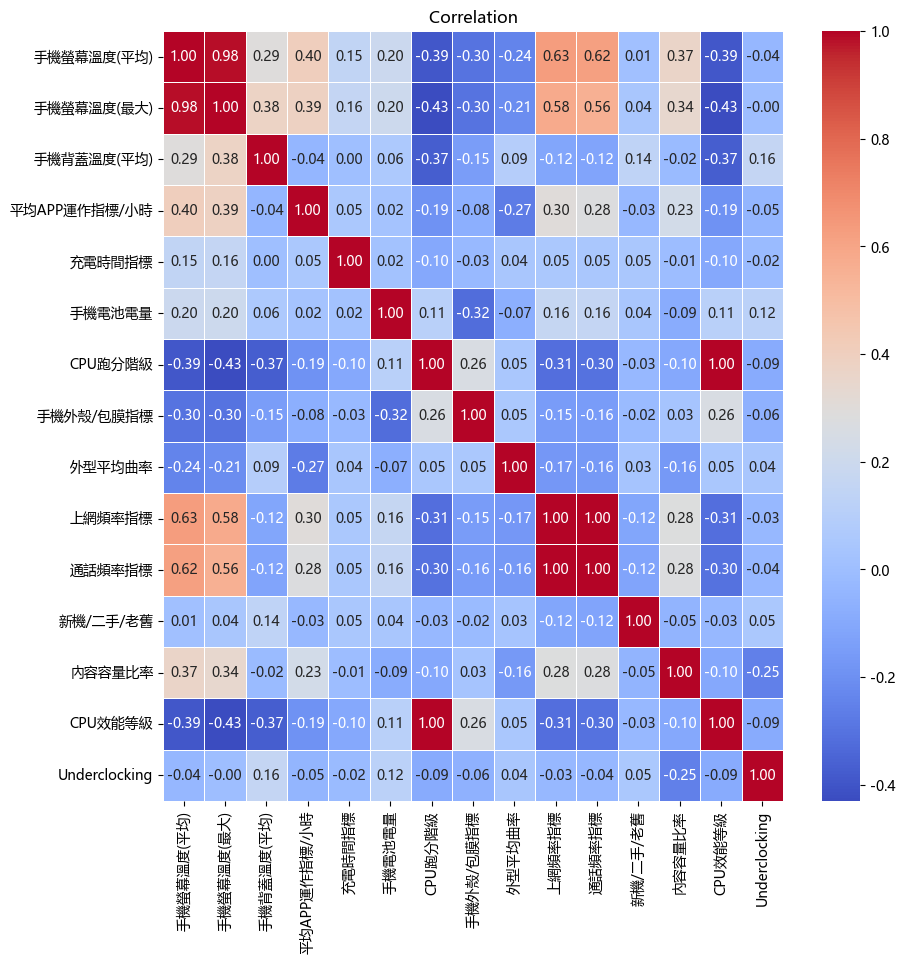

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [47]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','上網頻率指標','通話頻率指標','內容容量比率']	
x_data = data_train[feature_ex].to_numpy()



def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 

[[ 1.37526724  1.20305034 -0.74989887 ...  2.34927818  2.46085503
   0.87524065]
 [ 0.91710841  0.80066452  0.45124645 ... -0.41359851 -0.40498884
   0.46145452]
 [-0.62816949 -0.62291562 -1.28020019 ...  0.15898349  0.07948906
   0.88162933]
 ...
 [ 2.22201264  1.93407798 -1.27384861 ...  1.10244152  1.09604898
   0.56075538]
 [-1.45411807 -1.71785395 -0.87778362 ... -1.43089155 -1.28956231
  -0.0518147 ]
 [ 0.07545367  0.07444627  0.44261289 ...  0.71865731  0.73214218
  -1.40667106]]
[0 1 0 ... 0 0 0]


In [48]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [49]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate= 0.01,
                             max_depth=2,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7012893982808023
測試集:  0.6774847870182555


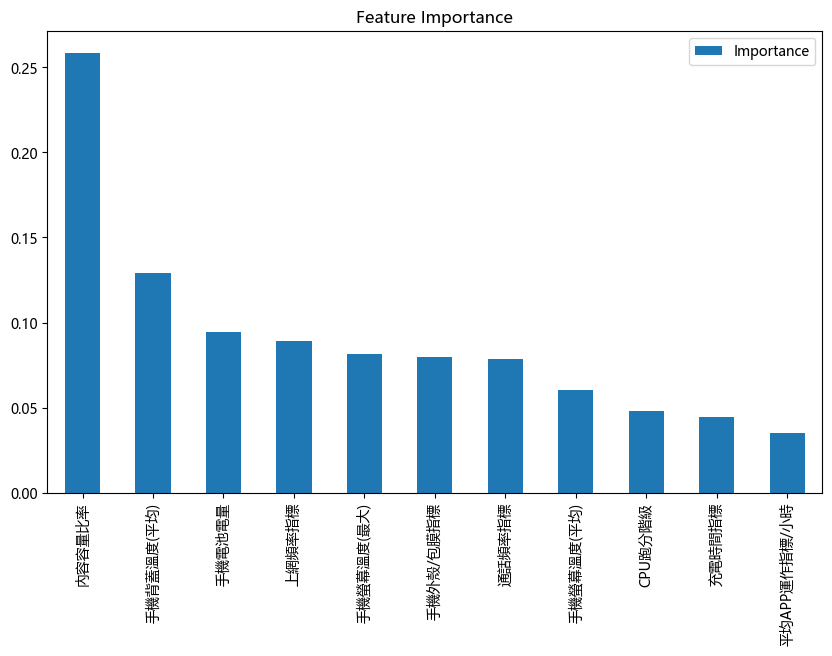

In [50]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [ ]:


def xgboostModel_fun(n=10000, lr=0.01, maxdepth=4, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 10
divisors = np.arange(0, change, 0.1)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(g=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()


In [ ]:
data_test =  pd.read_excel("01train.xlsx")
test_id=data_test.pop('id')

data_test=data_normalized(data_test)
data_test=data_standardized(data_test)

In [ ]:
predicted_ans=bst.predict(xgboostModel.DMatrix(testX))
my_submission=pd.DataFrame({'id':test_id.id,'Underclocking':predicted_ans})
my_submission.to_csv('submission.csv',index=False)

In [ ]:
#Cross-validation
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

df =data
X = df[['手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','內容容量比率']].values
Y = df['Underclocking'].values

In [ ]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 4
params['learning_rate'] = 0.01
params['gamma'] = 5

d_train = xgboost.DMatrix(trainX, label=trainY)
d_valid = xgboost.DMatrix(testX, label=testY)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

y_train = bst.predict(xgboost.DMatrix(trainX))
bst = xgboost.train(params, d_train, 800, watchlist, early_stopping_rounds=100, verbose_eval=10)
y_pred = bst.predict(xgboost.DMatrix(testX))
print("Accuracy(train): ", str(sum(trainY == (y_train > 0.5))/trainY.shape[0]))
print("Accuracy(test): ", str(sum(testY == (y_pred > 0.5))/testY.shape[0]))

[110]	train-logloss:0.57812	valid-logloss:0.61465
[120]	train-logloss:0.57359	valid-logloss:0.61189
[130]	train-logloss:0.56887	valid-logloss:0.60954
[140]	train-logloss:0.56470	valid-logloss:0.60731
[150]	train-logloss:0.56100	valid-logloss:0.60538
[160]	train-logloss:0.55767	valid-logloss:0.60331
[170]	train-logloss:0.55442	valid-logloss:0.60137
[180]	train-logloss:0.55148	valid-logloss:0.59960
[190]	train-logloss:0.54873	valid-logloss:0.59802
[200]	train-logloss:0.54572	valid-logloss:0.59583
[210]	train-logloss:0.54296	valid-logloss:0.59366
[220]	train-logloss:0.54055	valid-logloss:0.59189
[230]	train-logloss:0.53838	valid-logloss:0.59060
[240]	train-logloss:0.53641	valid-logloss:0.58928
[250]	train-logloss:0.53481	valid-logloss:0.58817
[260]	train-logloss:0.53350	valid-logloss:0.58717
[270]	train-logloss:0.53206	valid-logloss:0.58625
[280]	train-logloss:0.53186	valid-logloss:0.58614
[290]	train-logloss:0.53186	valid-logloss:0.58614
[300]	train-logloss:0.53186	valid-logloss:0.58614
